# ÌîÑÎ°úÏ†ùÌä∏3 : Ïπ¥Î©îÎùº Ïä§Ìã∞Ïª§Ïï± ÎßåÎì§Í∏∞ Ï≤´Í±∏Ïùå

(1) ÏñºÍµ¥Ïù∏Ïãù Ïπ¥Î©îÎùºÏùò ÌùêÎ¶Ñ

  ÏñºÍµ¥Ïù¥ Ìè¨Ìï®Îêú ÏÇ¨ÏßÑ Ï§ÄÎπÑ -> ÏñºÍµ¥Ïùò bounding box Ï∞æÍ∏∞ -> Îàà, ÏΩî, ÏûÖ, Í∑Ä Îì±Ïùò landmark Ï∞æÍ∏∞ -> Ï∞æÏïÑÏßÑ ÏòÅÏó≠ÏúºÎ°ú Î∂ÄÌÑ∞ ÏõêÌïòÎäî Ïä§Ìã∞Ïª§ Î∂ÄÏ∞©
  

(2) dlib ÎùºÏù¥Î∏åÎü¨Î¶¨ÎûÄ?   
  Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨, ÏÑ†ÌòïÎåÄÏàò ÎøêÎßå ÏïÑÎãàÎùº Îã§ÏñëÌïú Î®∏Ïã†Îü¨Îãù ÏïåÍ≥†Î¶¨Ï¶òÏùÑ ÌôúÏö©Ìï† Ïàò ÏûàÎäî ÎùºÏù¥Î∏åÎü¨Î¶¨Î°ú, ÌäπÌûà HOG(Histogram of Oriented Gradients) ÌäπÏÑ±ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏñºÍµ¥ Í≤ÄÏ∂úÌïòÎäî Í∏∞Îä•Ïù¥ ÎßéÏù¥ ÏÇ¨Ïö©ÎêòÍ≥† ÏÜåÍ∞úÎêúÎã§.



---

## Î™©Ï∞®

1. ÏÇ¨ÏßÑ Ï§ÄÎπÑ
2. ÏñºÍµ¥ Í≤ÄÏ∂ú face detection
3. ÏñºÍµ¥ ÎûúÎìúÎßàÌÅ¨ face landmark
4. Ïä§Ìã∞Ïª§ Ï†ÅÏö©ÌïòÍ∏∞
5. Ïó¨Îü¨ Ï¢ÖÎ•òÏùò Ïù¥ÎØ∏ÏßÄ ÌÖåÏä§Ìä∏
6. ÌöåÍ≥†   
  <1> Îß§Ïö∞ Î∞ùÏùÄ ÏñºÍµ¥ Ïù¥ÎØ∏ÏßÄ   
  <2> ÎåÄÎπÑÍ∞Ä ÎÇÆÏùÄ ÌùëÎ∞± ÏÇ¨ÏßÑ   
  <3> Ïó¨Îü¨ Î™ÖÏù∏ ÏÇ¨ÏßÑ   
  <4> ÏòÜ Î™®Ïäµ ÏÇ¨ÏßÑ   
  <5> Í∏∞Ï°¥ ÏÇ¨ÏßÑ Ïû¨Ïã§Ìóò   
  <6> ÏñºÍµ¥ ÏùºÎ∂ÄÍ∞Ä Í∞ÄÎ†§ÏßÑ ÏÇ¨ÏßÑ   
  <7> ÏñºÍµ¥ Ï†ÑÏ≤¥Í∞Ä Îã¥Í∏∞ÏßÄ ÏïäÏùÄ ÏÇ¨ÏßÑ

###**1. ÏÇ¨ÏßÑ Ï§ÄÎπÑ**

ÎîîÎ†âÌÜ†Î¶¨ ÏÉùÏÑ±

In [1]:
! mkdir project3
! mkdir project3/model
! ls

project3  sample_data


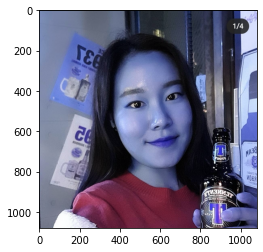

In [2]:
#Ï∞æÏùÄ Ïù¥ÎØ∏ÏßÄ Ï∂úÎ†•

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import dlib

my_image_path = '/content/project3/image/selfie.jpg'
img_bgr = cv2.imread(my_image_path)    # OpenCVÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨ÏòµÎãàÎã§
img_show = img_bgr.copy()      # Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄÎ•º Îî∞Î°ú Î≥¥Í¥ÄÌï©ÎãàÎã§
plt.imshow(img_bgr)
plt.show()

‚ùó pencvÎäî BGR(ÌååÎûë, ÎÖπÏÉâ, Îπ®Í∞ï)ÏùÑ ÏÇ¨Ïö©ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê ÏõêÎ≥∏Ïùò Îπ®Í∞ÑÏÉâÏù¥ ÌååÎûÄÏÉâÏúºÎ°ú, ÏõêÎ≥∏Ïùò ÌååÎûÄÏÉâÏù¥ Îπ®Í∞ÑÏÉâÏúºÎ°ú Î∞òÏ†ÑÎêòÏñ¥ ÎÇòÏò®Îã§.

Îî∞ÎùºÏÑú Îã§Î•∏ Ïù¥ÎØ∏ÏßÄ ÎùºÏù¥Î∏åÎü¨Î¶¨ÏóêÏÑú ÏÇ¨Ïö©ÌïòÍ∏∞ ÏúÑÌï¥ÏÑúÎäî ÏÉâ Î≥¥Ï†ïÏ≤òÎ¶¨Í∞Ä ÌïÑÏöîÌïòÎã§.

In [3]:
#Ïù¥ÎØ∏ÏßÄ ÏÉâÏÉÅ Î≥µÍµ¨
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

‚ùó detector_hogÏùò Îëê Î≤àÏß∏ ÌååÎùºÎØ∏ÌÑ∞Îäî Ïù¥ÎØ∏ÏßÄ ÌîºÎùºÎØ∏ÎìúÏùò ÏàòÏûÖÎãàÎã§. Ïù¥ÎØ∏ÏßÄÎ•º upsampling Î∞©Î≤ïÏùÑ ÌÜµÌï¥ ÌÅ¨Í∏∞Î•º ÌÇ§Ïö∞Îäî Í≤ÉÏùÑ Ïù¥ÎØ∏ÏßÄ ÌîºÎùºÎØ∏ÎìúÎùºÍ≥† Ìï©ÎãàÎã§. Ïù¥ÎØ∏ÏßÄ ÌîºÎùºÎØ∏ÎìúÏóêÏÑú ÏñºÍµ¥ÏùÑ Îã§Ïãú Í≤ÄÏ∂úÌïòÎ©¥ ÏûëÍ≤å Ï¥¨ÏòÅÎêú ÏñºÍµ¥ÏùÑ ÌÅ¨Í≤å Î≥º Ïàò ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê Îçî Ï†ïÌôïÌïú Í≤ÄÏ∂úÏù¥ Í∞ÄÎä•Ìï©ÎãàÎã§. 

### **2. ÏñºÍµ¥ Í≤ÄÏ∂ú face detection**

dlibÏùò face detectorÎäî HOG(Histogram of Oriented Gradients)ÏôÄ SVM(Support Vector Machine)ÏùÑ ÏÇ¨Ïö©Ìï¥ÏÑú ÏñºÍµ¥ Ï∞æÍ∏∞

Ïù¥Îïå HOGÎäî Ïù¥ÎØ∏ÏßÄÏóêÏÑú ÏÉâÏÉÅÏùò Î≥ÄÌôîÎüâÏùÑ ÎÇòÌÉÄÎÇ∏ Í≤É

In [4]:
# detectorÎ•º ÏÑ†Ïñ∏
detector_hog = dlib.get_frontal_face_detector()
print("üå´üõ∏")

# detector_hogÎ•º Ïù¥Ïö©Ìï¥ÏÑú ÏñºÍµ¥Ïùò bounding boxÎ•º Ï∂îÏ∂ú
# dlibÏùÄ rgb Ïù¥ÎØ∏ÏßÄÎ•º ÏûÖÎ†•ÏúºÎ°ú Î∞õÍ∏∞ ÎïåÎ¨∏Ïóê cvtColor() Î•º Ïù¥Ïö©Ìï¥ bgrÏùÑ rgbÎ°ú Î≥ÄÌôò
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("üå´üõ∏")

üå´üõ∏
üå´üõ∏


detector_hogÏùò Îëê Î≤àÏß∏ ÌååÎùºÎØ∏ÌÑ∞Îäî Ïù¥ÎØ∏ÏßÄ ÌîºÎùºÎØ∏ÎìúÏùò ÏàòÏûÖÎãàÎã§. 

Ïù¥ÎØ∏ÏßÄÎ•º upsampling Î∞©Î≤ïÏùÑ ÌÜµÌï¥ ÌÅ¨Í∏∞Î•º ÌÇ§Ïö∞Îäî Í≤ÉÏùÑ Ïù¥ÎØ∏ÏßÄ ÌîºÎùºÎØ∏ÎìúÎùºÍ≥† Ìï©ÎãàÎã§.

Ïù¥ÎØ∏ÏßÄ ÌîºÎùºÎØ∏ÎìúÏóêÏÑú ÏñºÍµ¥ÏùÑ Îã§Ïãú Í≤ÄÏ∂úÌïòÎ©¥ ÏûëÍ≤å Ï¥¨ÏòÅÎêú ÏñºÍµ¥ÏùÑ ÌÅ¨Í≤å Î≥º Ïàò ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê Îçî Ï†ïÌôïÌïú Í≤ÄÏ∂úÏù¥ Í∞ÄÎä•

rectangles[[(348, 297) (810, 759)]]


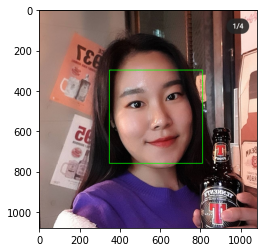

In [5]:
# Ï∞æÏùÄ ÏñºÍµ¥ ÏòÅÏó≠ Î∞ïÏä§ Î¶¨Ïä§Ìä∏
# Ïó¨Îü¨ ÏñºÍµ¥Ïù¥ ÏûàÏùÑ Ïàò ÏûàÏäµÎãàÎã§
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

dlib.rectangleÍ∞ùÏ≤¥Îäî left(), top(), right(), bottom(), height(), width() Îì±Ïùò Î©§Î≤Ñ Ìï®ÏàòÎ•º Ìè¨Ìï®

### **3. ÏñºÍµ¥ ÎûúÎìúÎßàÌÅ¨ face landmark**   

Ïù¥Î™©Íµ¨ÎπÑÏùò ÏúÑÏπòÎ•º Ï∂îÎ°†ÌïòÎäî Í≤ÉÏùÑ face landmark localization Í∏∞Ïà†Ïù¥ÎùºÍ≥† Ìï®

<img src="https://d3s0tskafalll9.cloudfront.net/media/original_images/E-8-8.png" width="" height=""  title="px(ÌîΩÏÖÄ) ÌÅ¨Í∏∞ ÏÑ§Ï†ï" alt="ÎûúÎìúÎßàÌÅ¨"></img><br/>
[DlibÏóê ÏÇ¨Ïö© ÎêòÎäî ÎûúÎìúÎßàÌÅ¨ ÏàúÏÑú]   

- Object keypoint estimation ÏïåÍ≥†Î¶¨Ï¶òÏù¥ÎûÄ?   
Face landmarkÏôÄ Í∞ôÏù¥ Í∞ùÏ≤¥ ÎÇ¥Î∂ÄÏùò Ï†êÏùÑ Ï∞æÎäî Í∏∞Ïà†ÏùÑ ÎßêÌïúÎã§.   
keypointÎ•º Ï∞æÎäî ÏïåÍ≥†Î¶¨Ï¶òÏùÄ ÌÅ¨Í≤å 2Í∞ÄÏßÄÎ°ú ÎÇòÎàÑÏñ¥ÏßÑÎã§.   
  - top-down : bounding boxÎ•º Ï∞æÍ≥† box ÎÇ¥Î∂ÄÏùò keypointÎ•º ÏòàÏ∏° => Ïù¥ Î∞©ÏãùÏùÑ ÏÇ¨Ïö©Ìï¥ÏÑú Ïä§Ìã∞Ïª§ Î∂ôÏùº ÏòàÏ†ï   
  - bottom-up : Ïù¥ÎØ∏ÏßÄ Ï†ÑÏ≤¥Ïùò keypointÎ•º Î®ºÏ†Ä Ï∞æÍ≥† point Í¥ÄÍ≥ÑÎ•º Ïù¥Ïö©Ìï¥ Íµ∞ÏßëÌôî Ìï¥ÏÑú box ÏÉùÏÑ±

---


 weight file Îã§Ïö¥Î∞õÍ∏∞

In [8]:
! wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
! ls
! cp ./shape_predictor_68_face_landmarks.dat.bz2 ./project3/model/
! bzip2 -d /content/project3/model/shape_predictor_68_face_landmarks.dat.bz2

--2022-01-18 08:05:22--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‚Äòshape_predictor_68_face_landmarks.dat.bz2‚Äô

shape_predictor_68_ 100%[===================>]  61.07M  42.0MB/s    in 1.5s    

2022-01-18 08:05:24 (42.0 MB/s) - ‚Äòshape_predictor_68_face_landmarks.dat.bz2‚Äô saved [64040097/64040097]

project3  sample_data  shape_predictor_68_face_landmarks.dat.bz2


In [9]:
# Ï†ÄÏû•Ìïú landmark Î™®Îç∏ÏùÑ Î∂àÎü¨Ïò§Í∏∞

model_path = '/content/project3/model/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("üå´üõ∏")

üå´üõ∏


‚ùó landmark_predictor Îäî RGB Ïù¥ÎØ∏ÏßÄÏôÄ dlib.rectangleÏùÑ ÏûÖÎ†• Î∞õÏïÑ dlib.full_object_detection Î•º Î∞òÌôò

In [10]:
list_landmarks = []

# ÏñºÍµ¥ ÏòÅÏó≠ Î∞ïÏä§ ÎßàÎã§ face landmarkÎ•º Ï∞æÏïÑÎÉÖÎãàÎã§
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark Ï¢åÌëúÎ•º Ï†ÄÏû•Ìï¥Îë°ÎãàÎã§
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


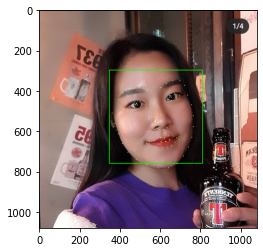

In [11]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### **4. Ïä§Ìã∞Ïª§ Ï†ÅÏö©ÌïòÍ∏∞**

In [12]:
#ÏΩî Ï¢åÌëú ÌôïÏù∏
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # ÏΩîÏùò indexÎäî 30 ÏûÖÎãàÎã§
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(612, 552)
(x,y) : (612,321)
(w,h) : (463,463)


(463, 463, 3)


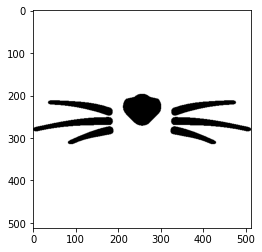

In [14]:
sticker_path = '/content/project3/image/cat.png'
img_sticker = cv2.imread(sticker_path) # Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨ÏòµÎãàÎã§
plt.imshow(img_sticker)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

In [15]:
#x, y Ï¢åÌëú Ï°∞Ï†à
refined_x = x - w // 2
refined_y = y    #ÏúÑ ÏïÑÎûò ÏúÑÏπòÎ•º Ï°∞Ï†àÌï¥Ï§å
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (381,321)


In [16]:
#-ÌÅ¨Î°≠
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (381,321)


Ïäù~


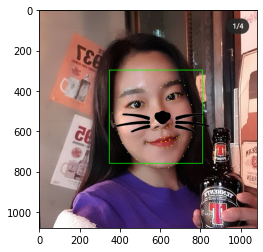

In [17]:
#Ïä§Ìã∞Ïª§ Ï†ÅÏö© ÌõÑ Ï∂úÎ†•
# Í∏∏Ïñ¥ÏÑú Î≥µÏû°Ìï¥ Î≥¥Ïù¥ÏßÄÎßå img_show[from:to] ÌòïÏãùÏûÖÎãàÎã§
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)    # Ïù¥ Ï°∞Í±¥ÏùÑ Î∞îÍøîÏ§å , Ïñ¥Î†§Ïö¥ Î∂ÄÎ∂ÑÏù¥Íµ∞.. ÎèôÏÑ≠ÎãòÏùÄ img_sticker!=0 Ïù¥Î†áÍ≤å ÌïòÏÖ®Îã§Í≥† Ìï®
print("Ïäù~")

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

### **5. Ïó¨Îü¨ Ï¢ÖÎ•òÏùò Ïù¥ÎØ∏ÏßÄ ÌÖåÏä§Ìä∏**
<1> Îß§Ïö∞ Î∞ùÏùÄ ÏñºÍµ¥ Ïù¥ÎØ∏ÏßÄ

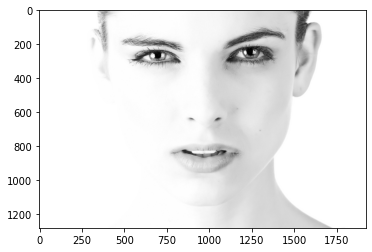

(984, 604)


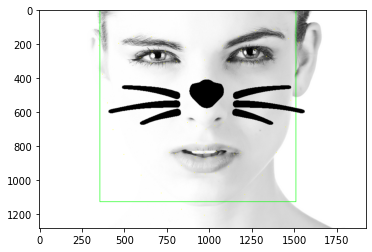

In [20]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import dlib

#(1) Ïù¥ÎØ∏ÏßÄ Í∞ÄÏ†∏Ïò§Í∏∞
my_image_path = '/content/project3/image/woman.jpg'
img_bgr = cv2.imread(my_image_path)    # OpenCVÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨ÏòµÎãàÎã§
img_show = img_bgr.copy()      # Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄÎ•º Îî∞Î°ú Î≥¥Í¥ÄÌï©ÎãàÎã§
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)    #Ïù¥ÎØ∏ÏßÄ ÏÉâÏÉÅ Î≥µÍµ¨ BGR ->RGB
plt.imshow(img_rgb)
plt.show()

#(2) ÏñºÍµ¥ Í≤ÄÏ∂úÌïòÍ∏∞
detector_hog = dlib.get_frontal_face_detector()    # detectorÎ•º ÏÑ†Ïñ∏
dlib_rects = detector_hog(img_rgb, 1)   #ÏñºÍµ¥Ïùò bounding boxÎ•º Ï∂îÏ∂ú

# Ï∞æÏùÄ ÏñºÍµ¥ ÏòÅÏó≠Ïùò Î∞ïÏä§ ÌëúÏãú

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

#(3) ÏñºÍµ¥ ÎûúÎìúÎßàÌÅ¨ face landmark
# Ï†ÄÏû•Ìïú landmark Î™®Îç∏ÏùÑ Î∂àÎü¨Ïò§Í∏∞

model_path = '/content/project3/model/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

# ÏñºÍµ¥ ÏòÅÏó≠ Î∞ïÏä§ ÎßàÎã§ face landmarkÎ•º Ï∞æÏïÑÎÉÑ
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

#(4) Ïä§Ìã∞Ïª§ Ï†ÅÏö©ÌïòÍ∏∞
#ÏΩî Ï¢åÌëú ÌôïÏù∏
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # ÏΩîÏùò indexÎäî 30 ÏûÖÎãàÎã§
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()

#Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄ Î∂àÎü¨Ïò§Í∏∞ Î∞è Î¶¨ÏÇ¨Ïù¥Ï¶à
sticker_path = '/content/project3/image/cat.png'
img_sticker = cv2.imread(sticker_path)
plt.imshow(img_sticker)
img_sticker = cv2.resize(img_sticker, (w,h))

#x, y Ï¢åÌëú Ï°∞Ï†à
refined_x = x - w // 2
refined_y = y 

#-ÌÅ¨Î°≠
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

#Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄ Ï†ÅÏö©
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8) 

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

<2> ÎåÄÎπÑÍ∞Ä ÎÇÆÏùÄ ÌùëÎ∞± ÏÇ¨ÏßÑ

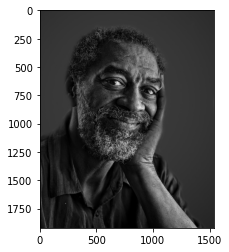

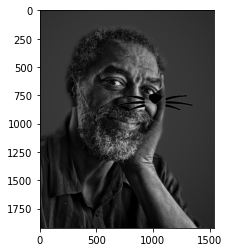

In [26]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import dlib

#(1) Ïù¥ÎØ∏ÏßÄ Í∞ÄÏ†∏Ïò§Í∏∞
my_image_path = '/content/project3/image/man.jpg'
img_bgr = cv2.imread(my_image_path)    # OpenCVÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨ÏòµÎãàÎã§
img_show = img_bgr.copy()      # Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄÎ•º Îî∞Î°ú Î≥¥Í¥ÄÌï©ÎãàÎã§
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)    #Ïù¥ÎØ∏ÏßÄ ÏÉâÏÉÅ Î≥µÍµ¨ BGR ->RGB
plt.imshow(img_rgb)
plt.show()

#(2) ÏñºÍµ¥ Í≤ÄÏ∂úÌïòÍ∏∞
detector_hog = dlib.get_frontal_face_detector()    # detectorÎ•º ÏÑ†Ïñ∏
dlib_rects = detector_hog(img_rgb, 1)   #ÏñºÍµ¥Ïùò bounding boxÎ•º Ï∂îÏ∂ú

# Ï∞æÏùÄ ÏñºÍµ¥ ÏòÅÏó≠Ïùò Î∞ïÏä§ ÌëúÏãú

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

#(3) ÏñºÍµ¥ ÎûúÎìúÎßàÌÅ¨ face landmark
# Ï†ÄÏû•Ìïú landmark Î™®Îç∏ÏùÑ Î∂àÎü¨Ïò§Í∏∞

model_path = '/content/project3/model/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

# ÏñºÍµ¥ ÏòÅÏó≠ Î∞ïÏä§ ÎßàÎã§ face landmarkÎ•º Ï∞æÏïÑÎÉÑ
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

#(4) Ïä§Ìã∞Ïª§ Ï†ÅÏö©ÌïòÍ∏∞
#ÏΩî Ï¢åÌëú ÌôïÏù∏
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # ÏΩîÏùò indexÎäî 30 ÏûÖÎãàÎã§
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()

#Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄ Î∂àÎü¨Ïò§Í∏∞ Î∞è Î¶¨ÏÇ¨Ïù¥Ï¶à
sticker_path = '/content/project3/image/cat.png'
img_sticker = cv2.imread(sticker_path)
plt.imshow(img_sticker)
img_sticker = cv2.resize(img_sticker, (w,h))

#x, y Ï¢åÌëú Ï°∞Ï†à
refined_x = x - w // 2
refined_y = y 

#-ÌÅ¨Î°≠
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

#Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄ Ï†ÅÏö©
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8) 

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

<3> Ïó¨Îü¨ Î™ÖÏù∏ ÏÇ¨ÏßÑ

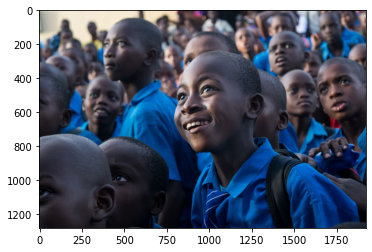

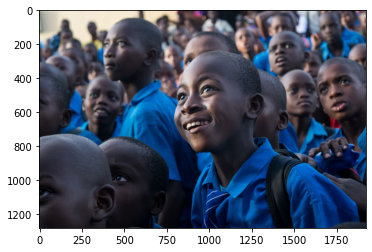

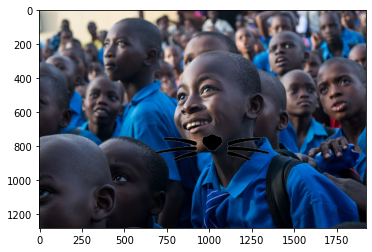

In [25]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import dlib

#(1) Ïù¥ÎØ∏ÏßÄ Í∞ÄÏ†∏Ïò§Í∏∞
my_image_path = '/content/project3/image/people.jpg'
img_bgr = cv2.imread(my_image_path)    # OpenCVÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨ÏòµÎãàÎã§
img_show = img_bgr.copy()      # Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄÎ•º Îî∞Î°ú Î≥¥Í¥ÄÌï©ÎãàÎã§
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)    #Ïù¥ÎØ∏ÏßÄ ÏÉâÏÉÅ Î≥µÍµ¨ BGR ->RGB
plt.imshow(img_rgb)
plt.show()

#(2) ÏñºÍµ¥ Í≤ÄÏ∂úÌïòÍ∏∞
detector_hog = dlib.get_frontal_face_detector()    # detectorÎ•º ÏÑ†Ïñ∏
dlib_rects = detector_hog(img_rgb, 1)   #ÏñºÍµ¥Ïùò bounding boxÎ•º Ï∂îÏ∂ú

# Ï∞æÏùÄ ÏñºÍµ¥ ÏòÅÏó≠Ïùò Î∞ïÏä§ ÌëúÏãú

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

#(3) ÏñºÍµ¥ ÎûúÎìúÎßàÌÅ¨ face landmark
# Ï†ÄÏû•Ìïú landmark Î™®Îç∏ÏùÑ Î∂àÎü¨Ïò§Í∏∞

model_path = '/content/project3/model/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

# ÏñºÍµ¥ ÏòÅÏó≠ Î∞ïÏä§ ÎßàÎã§ face landmarkÎ•º Ï∞æÏïÑÎÉÑ
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

#(4) Ïä§Ìã∞Ïª§ Ï†ÅÏö©ÌïòÍ∏∞
#ÏΩî Ï¢åÌëú ÌôïÏù∏
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # ÏΩîÏùò indexÎäî 30 ÏûÖÎãàÎã§
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()

#Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄ Î∂àÎü¨Ïò§Í∏∞ Î∞è Î¶¨ÏÇ¨Ïù¥Ï¶à
sticker_path = '/content/project3/image/cat.png'
img_sticker = cv2.imread(sticker_path)
plt.imshow(img_sticker)
img_sticker = cv2.resize(img_sticker, (w,h))

#x, y Ï¢åÌëú Ï°∞Ï†à
refined_x = x - w // 2
refined_y = y 

#-ÌÅ¨Î°≠
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

#Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄ Ï†ÅÏö©
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8) 

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

<4> ÏòÜ Î™®Ïäµ ÏÇ¨ÏßÑ

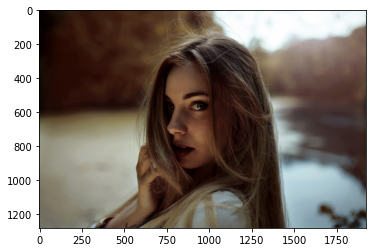

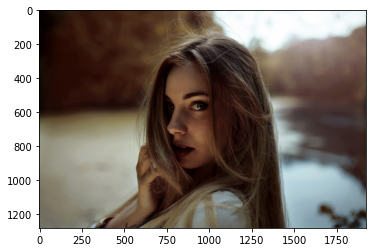

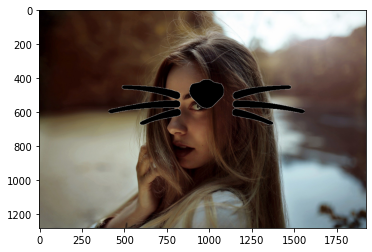

In [22]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import dlib

#(1) Ïù¥ÎØ∏ÏßÄ Í∞ÄÏ†∏Ïò§Í∏∞
my_image_path = '/content/project3/image/model.jpg'
img_bgr = cv2.imread(my_image_path)    # OpenCVÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨ÏòµÎãàÎã§
img_show = img_bgr.copy()      # Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄÎ•º Îî∞Î°ú Î≥¥Í¥ÄÌï©ÎãàÎã§
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)    #Ïù¥ÎØ∏ÏßÄ ÏÉâÏÉÅ Î≥µÍµ¨ BGR ->RGB
plt.imshow(img_rgb)
plt.show()

#(2) ÏñºÍµ¥ Í≤ÄÏ∂úÌïòÍ∏∞
detector_hog = dlib.get_frontal_face_detector()    # detectorÎ•º ÏÑ†Ïñ∏
dlib_rects = detector_hog(img_rgb, 1)   #ÏñºÍµ¥Ïùò bounding boxÎ•º Ï∂îÏ∂ú

# Ï∞æÏùÄ ÏñºÍµ¥ ÏòÅÏó≠Ïùò Î∞ïÏä§ ÌëúÏãú

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

#(3) ÏñºÍµ¥ ÎûúÎìúÎßàÌÅ¨ face landmark
# Ï†ÄÏû•Ìïú landmark Î™®Îç∏ÏùÑ Î∂àÎü¨Ïò§Í∏∞

model_path = '/content/project3/model/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

# ÏñºÍµ¥ ÏòÅÏó≠ Î∞ïÏä§ ÎßàÎã§ face landmarkÎ•º Ï∞æÏïÑÎÉÑ
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

#(4) Ïä§Ìã∞Ïª§ Ï†ÅÏö©ÌïòÍ∏∞
#ÏΩî Ï¢åÌëú ÌôïÏù∏
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # ÏΩîÏùò indexÎäî 30 ÏûÖÎãàÎã§
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()

#Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄ Î∂àÎü¨Ïò§Í∏∞ Î∞è Î¶¨ÏÇ¨Ïù¥Ï¶à
sticker_path = '/content/project3/image/cat.png'
img_sticker = cv2.imread(sticker_path)
plt.imshow(img_sticker)
img_sticker = cv2.resize(img_sticker, (w,h))

#x, y Ï¢åÌëú Ï°∞Ï†à
refined_x = x - w // 2
refined_y = y 

#-ÌÅ¨Î°≠
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

#Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄ Ï†ÅÏö©
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8) 

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

<5> Í∏∞Ï°¥ ÏÇ¨ÏßÑ Ïû¨Ïã§Ìóò

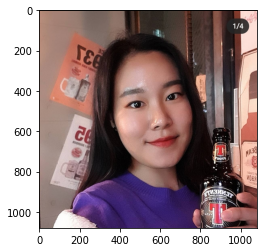

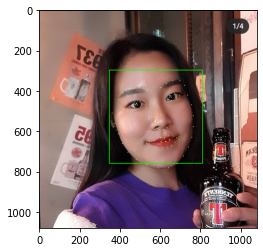

(612, 552)


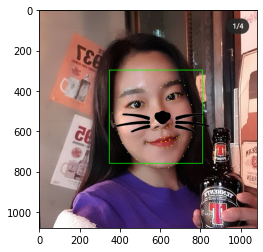

In [23]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import dlib

#(1) Ïù¥ÎØ∏ÏßÄ Í∞ÄÏ†∏Ïò§Í∏∞
my_image_path = '/content/project3/image/selfie.jpg'
img_bgr = cv2.imread(my_image_path)    # OpenCVÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨ÏòµÎãàÎã§
img_show = img_bgr.copy()      # Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄÎ•º Îî∞Î°ú Î≥¥Í¥ÄÌï©ÎãàÎã§
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)    #Ïù¥ÎØ∏ÏßÄ ÏÉâÏÉÅ Î≥µÍµ¨ BGR ->RGB
plt.imshow(img_rgb)
plt.show()

#(2) ÏñºÍµ¥ Í≤ÄÏ∂úÌïòÍ∏∞
detector_hog = dlib.get_frontal_face_detector()    # detectorÎ•º ÏÑ†Ïñ∏
dlib_rects = detector_hog(img_rgb, 1)   #ÏñºÍµ¥Ïùò bounding boxÎ•º Ï∂îÏ∂ú

# Ï∞æÏùÄ ÏñºÍµ¥ ÏòÅÏó≠Ïùò Î∞ïÏä§ ÌëúÏãú

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

#(3) ÏñºÍµ¥ ÎûúÎìúÎßàÌÅ¨ face landmark
# Ï†ÄÏû•Ìïú landmark Î™®Îç∏ÏùÑ Î∂àÎü¨Ïò§Í∏∞

model_path = '/content/project3/model/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

# ÏñºÍµ¥ ÏòÅÏó≠ Î∞ïÏä§ ÎßàÎã§ face landmarkÎ•º Ï∞æÏïÑÎÉÑ
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

#(4) Ïä§Ìã∞Ïª§ Ï†ÅÏö©ÌïòÍ∏∞
#ÏΩî Ï¢åÌëú ÌôïÏù∏
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # ÏΩîÏùò indexÎäî 30 ÏûÖÎãàÎã§
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()

#Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄ Î∂àÎü¨Ïò§Í∏∞ Î∞è Î¶¨ÏÇ¨Ïù¥Ï¶à
sticker_path = '/content/project3/image/cat.png'
img_sticker = cv2.imread(sticker_path)
plt.imshow(img_sticker)
img_sticker = cv2.resize(img_sticker, (w,h))

#x, y Ï¢åÌëú Ï°∞Ï†à
refined_x = x - w // 2
refined_y = y 

#-ÌÅ¨Î°≠
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

#Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄ Ï†ÅÏö©
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8) 

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

<6> ÏñºÍµ¥ ÏùºÎ∂ÄÍ∞Ä Í∞ÄÎ†§ÏßÑ ÏÇ¨ÏßÑ

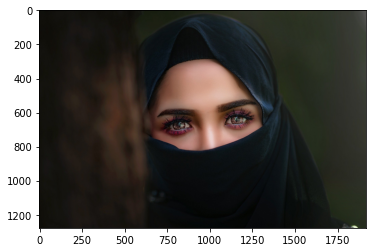

(1017, 807)


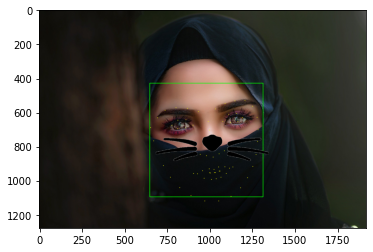

In [24]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import dlib

#(1) Ïù¥ÎØ∏ÏßÄ Í∞ÄÏ†∏Ïò§Í∏∞
my_image_path = '/content/project3/image/hijab.jpg'
img_bgr = cv2.imread(my_image_path)    # OpenCVÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨ÏòµÎãàÎã§
img_show = img_bgr.copy()      # Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄÎ•º Îî∞Î°ú Î≥¥Í¥ÄÌï©ÎãàÎã§
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)    #Ïù¥ÎØ∏ÏßÄ ÏÉâÏÉÅ Î≥µÍµ¨ BGR ->RGB
plt.imshow(img_rgb)
plt.show()

#(2) ÏñºÍµ¥ Í≤ÄÏ∂úÌïòÍ∏∞
detector_hog = dlib.get_frontal_face_detector()    # detectorÎ•º ÏÑ†Ïñ∏
dlib_rects = detector_hog(img_rgb, 1)   #ÏñºÍµ¥Ïùò bounding boxÎ•º Ï∂îÏ∂ú

# Ï∞æÏùÄ ÏñºÍµ¥ ÏòÅÏó≠Ïùò Î∞ïÏä§ ÌëúÏãú

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

#(3) ÏñºÍµ¥ ÎûúÎìúÎßàÌÅ¨ face landmark
# Ï†ÄÏû•Ìïú landmark Î™®Îç∏ÏùÑ Î∂àÎü¨Ïò§Í∏∞

model_path = '/content/project3/model/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

# ÏñºÍµ¥ ÏòÅÏó≠ Î∞ïÏä§ ÎßàÎã§ face landmarkÎ•º Ï∞æÏïÑÎÉÑ
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

#(4) Ïä§Ìã∞Ïª§ Ï†ÅÏö©ÌïòÍ∏∞
#ÏΩî Ï¢åÌëú ÌôïÏù∏
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # ÏΩîÏùò indexÎäî 30 ÏûÖÎãàÎã§
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()

#Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄ Î∂àÎü¨Ïò§Í∏∞ Î∞è Î¶¨ÏÇ¨Ïù¥Ï¶à
sticker_path = '/content/project3/image/cat.png'
img_sticker = cv2.imread(sticker_path)
plt.imshow(img_sticker)
img_sticker = cv2.resize(img_sticker, (w,h))

#x, y Ï¢åÌëú Ï°∞Ï†à
refined_x = x - w // 2
refined_y = y 

#-ÌÅ¨Î°≠
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

#Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄ Ï†ÅÏö©
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8) 

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

<7> ÏñºÍµ¥ Ï†ÑÏ≤¥Í∞Ä Îã¥Í∏∞ÏßÄ ÏïäÏùÄ ÏÇ¨ÏßÑ

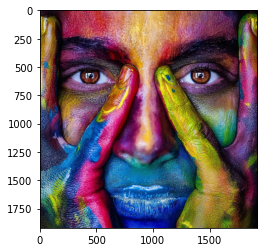

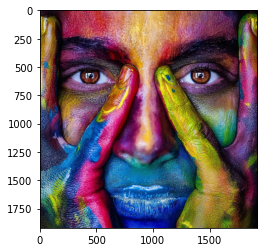

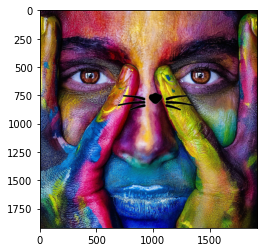

In [27]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import dlib

#(1) Ïù¥ÎØ∏ÏßÄ Í∞ÄÏ†∏Ïò§Í∏∞
my_image_path = '/content/project3/image/girl.jpg'
img_bgr = cv2.imread(my_image_path)    # OpenCVÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨ÏòµÎãàÎã§
img_show = img_bgr.copy()      # Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄÎ•º Îî∞Î°ú Î≥¥Í¥ÄÌï©ÎãàÎã§
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)    #Ïù¥ÎØ∏ÏßÄ ÏÉâÏÉÅ Î≥µÍµ¨ BGR ->RGB
plt.imshow(img_rgb)
plt.show()

#(2) ÏñºÍµ¥ Í≤ÄÏ∂úÌïòÍ∏∞
detector_hog = dlib.get_frontal_face_detector()    # detectorÎ•º ÏÑ†Ïñ∏
dlib_rects = detector_hog(img_rgb, 1)   #ÏñºÍµ¥Ïùò bounding boxÎ•º Ï∂îÏ∂ú

# Ï∞æÏùÄ ÏñºÍµ¥ ÏòÅÏó≠Ïùò Î∞ïÏä§ ÌëúÏãú

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

#(3) ÏñºÍµ¥ ÎûúÎìúÎßàÌÅ¨ face landmark
# Ï†ÄÏû•Ìïú landmark Î™®Îç∏ÏùÑ Î∂àÎü¨Ïò§Í∏∞

model_path = '/content/project3/model/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

# ÏñºÍµ¥ ÏòÅÏó≠ Î∞ïÏä§ ÎßàÎã§ face landmarkÎ•º Ï∞æÏïÑÎÉÑ
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

#(4) Ïä§Ìã∞Ïª§ Ï†ÅÏö©ÌïòÍ∏∞
#ÏΩî Ï¢åÌëú ÌôïÏù∏
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # ÏΩîÏùò indexÎäî 30 ÏûÖÎãàÎã§
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()

#Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄ Î∂àÎü¨Ïò§Í∏∞ Î∞è Î¶¨ÏÇ¨Ïù¥Ï¶à
sticker_path = '/content/project3/image/cat.png'
img_sticker = cv2.imread(sticker_path)
plt.imshow(img_sticker)
img_sticker = cv2.resize(img_sticker, (w,h))

#x, y Ï¢åÌëú Ï°∞Ï†à
refined_x = x - w // 2
refined_y = y 

#-ÌÅ¨Î°≠
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

#Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄ Ï†ÅÏö©
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8) 

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

## ***‚ùó‚ùó‚ùó Îã§ÏñëÌïú Ïù¥ÎØ∏ÏßÄ Ï†ÅÏö© Í≤∞Í≥º***   
- Îã§ÏñëÌïú Ïù¥ÎØ∏ÏßÄÏóê Ï†ÅÏö©ÏùÑ ÏãúÏºúÎ≥¥Îãà ÏÉùÍ∞ÅÎ≥¥Îã§ ÎßéÏùÄ ÏÇ¨ÏßÑÎì§ÏóêÏÑú ÏñºÍµ¥ÏùÑ Ïù∏Ïãù Î™ªÌïúÎã§Îäî Ï†êÏùÑ Î∞úÍ≤¨ÌïòÏòÄÎã§.   
- Ïã§Ï†úÎ°ú Ïó¨Îü¨ Ïπ¥Î©îÎùº Ïñ¥ÌîåÏùÑ ÏÇ¨Ïö©Ìï¥Î≥¥Î©¥ ÏñºÍµ¥Ïù¥ Î©ÄÏñ¥ÏßÄÍ±∞ÎÇò ÏòÜÎ™®Ïäµ ÎòêÎäî ÏΩîÏôÄ ÏûÖÏùÑ ÏÜêÏúºÎ°ú Í∞ÄÎ¶¨Îäî Îì±Ïùò Î≥ÄÏàòÎ•º Ï£ºÎ©¥ Ïñ¥Ìîå Ïä§Ìã∞Ïª§Í∞Ä ÎÇ¥ ÏñºÍµ¥Ïóê Ï†ÅÏö©Ïù¥ ÎêòÏßÄ ÏïäÎäîÎã§.   
 Îî∞ÎùºÏÑú ÏãúÏ§ë Ïπ¥Î©îÎùº Ïñ¥ÌîåÏùÑ ÏÉùÍ∞ÅÌïòÎ©¥ ÏúÑ Í≤∞Í≥ºÍ∞Ä ÏïÑÏ£º ÎÇòÏÅòÎã§Í≥†Îäî ÏÉùÍ∞ÅÌïòÏßÄ ÏïäÎäîÎã§.   

- Ïö∞ÏÑ† <1>Ïùò Í≤ΩÏö∞ ÏÇ¨ÏßÑÏùò ÎÖ∏Ï∂úÏù¥ Ïã¨Ìï¥ ÏÇ¨Ïã§ÏÉÅ ÏôºÏ™Ω Ïú§Í≥ΩÏù¥ ÎßéÏù¥ ÎÇ†ÏïÑÍ∞Ñ ÏÇ¨ÏßÑÏù¥Îã§.   
 Îî∞ÎùºÏÑú ÎÇòÎäî Ïù¥ ÏÇ¨ÏßÑÏóêÏÑúÎäî ÏñºÍµ¥ Ïù∏ÏãùÏùÑ Î™ªÌï¥ ÎûúÎìúÎßàÌÅ¨Î•º ÎßåÎì§Ïñ¥ÎÇ¥ÏßÄ Î™ª Ìï†Í≤ÉÏù¥ÎùºÍ≥† ÏòàÏÉÅÌñàÎã§.   
 ÎÇòÏùò ÏòàÏÉÅÍ≥ºÎäî Îã§Î•¥Í≤å Ïä§Ìã∞Ïª§ÍπåÏßÄ Îß§Ïö∞ ÏôÑÎ≤ΩÌïòÍ≤å Ïûò Ï†ÅÏö©Îêú ÏÇ¨Î°ÄÎã§.

- <2>ÏôÄ <3>ÏùÄ Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú ÌôïÏù∏Ìï¥Î≥¥Î©¥ ÏÇ¨ÎûåÏùò ÌîºÎ∂ÄÌÜ§Í≥º Î∞∞Í≤ΩÏùò ÌÜ§ Ï∞®Ïù¥Í∞Ä ÎßéÏù¥ ÎÇòÏßÄÏïäÎäî ÏÇ¨ÏßÑÏù¥Îã§. Îëò Îã§ ÏÇ¨Îûå ÏñºÍµ¥ÏùÑ Ïù∏ÏãùÌïòÏßÄ Î™ªÌñàÍ≥†, Ïä§Ìã∞Ïª§Îäî ÏïÑÎ¨¥Îç∞ÎÇò Î∂ôÏó¨Ï°åÎã§. Îî∞ÎùºÏÑú ÏñºÍµ¥Í≥º Î∞∞Í≤ΩÏùò ÎåÄÎπÑÍ∞Ä ÎÜíÏùÄ ÏÇ¨ÏßÑÏù¥ Ïù∏ÏãùÌïòÍ∏∞ Ï¢ãÏùÄ Í≤É Í∞ôÎã§.   
- <4>Îäî ÏòÜÎ™®ÏäµÏúºÎ°ú ÏòàÏÉÅÌñàÎçòÎåÄÎ°ú ÏñºÍµ¥ Ïù∏ÏãùÏùÑ ÌïòÏßÄ Î™ªÌñàÎã§.   
- <5>Îäî <2><3><4> ÏÇ¨Î°ÄÏóêÏÑú ÏñºÍµ¥ Ïù∏ÏãùÏùÑ ÌïòÏßÄ Î™ªÌñàÏùåÏóêÎèÑ Ïä§Ìã∞Ïª§Í∞Ä ÌäπÏ†ï ÏúÑÏπòÏóê Î∂ôÍ∏∏Îûò Ï≤òÏùåÏóê ÏßÑÌñâÌñàÎçò ÎÇ¥ ÏÇ¨ÏßÑÏúºÎ°ú Îã§Ïãú Ïä§Ìã∞Ïª§Î•º Î∂ôÏù∏ ÌõÑ <2> ÏùÑ ÏßÑÌñâÌï¥Î≥¥ÏïòÎã§.   
ÌõÑÏàúÏúÑÏóê ÏßÑÌñâÎêòÎäî ÏÇ¨Î°ÄÎì§ Ï§ë ÏñºÍµ¥Ïù∏ÏãùÏùÑ ÌïòÏßÄ Î™ªÌïú ÏÇ¨ÏßÑÎì§ÏùÄ ÏïûÏÑú ÏßÑÌñâÎêú Ïä§Ìã∞Ïª§Ïùò ÌÅ¨Í∏∞ÏôÄ ÏúÑÏπòÏóê Î∂ôÏó¨ÏßÄÎäî Í≤ÉÏùÑ Î∞úÍ≤¨ÌïòÏòÄÎã§.   
- <6> Î≤àÏùÄ ÏñºÍµ¥ ÏùºÎ∂ÄÍ∞Ä Í∞ÄÎ†§ÏßÑ ÏÇ¨ÏßÑÏúºÎ°ú ÏùòÏô∏Î•º Í≤∞Í≥ºÍ∞Ä ÎÇòÌÉÄÎÇòÏòÄÎã§. ÏΩîÍπåÏßÄ Í∞ÄÎ†§ÏßÑ ÏÇ¨ÏßÑÏù¥Îùº ÎãπÏó∞Ìûà Ïù∏ÏãùÌïòÏßÄ Î™ªÌï† Ï§Ñ ÏïåÏïòÎäîÎç∞ ÏñºÍµ¥ ÏÉÅÎã®Ïùò ÏñºÍµ¥ÌòïÏôÄ ÎààÏùò ÏúÑÏπòÍ∞Ä ÎöúÎ†∑Ìï¥ Í∑∏ Î∂ÄÎ∂ÑÎßåÏúºÎ°ú ÎûúÎìúÎßàÌÅ¨Í∞Ä Î∂ôÏñ¥ ÏûêÏó∞Ïä§Î†à ÏΩîÏùò ÏúÑÏπòÍ∞Ä Ïú†Ï∂îÎêòÏóàÎã§. Îî∞ÎùºÏÑú Ìï¥Îãπ ÏÇ¨ÏßÑÎèÑ Ïä§Ìã∞Ïª§ÏÇ¨ÏßÑÏù¥ Îß§Ïö∞ Ïûò Î∂ôÏóàÎã§.
- ÎßàÏßÄÎßâ <7>ÏùÑ ÌÜµÌï¥ ÏñºÎ£©ÏßÑ ÏñºÍµ¥Ïóê ÏñºÍµ¥ ÌòïÌÉúÎ•º Í∞ÄÏßÑ ÏÇ¨ÏßÑÏùÑ ÏÇ¨Ïö©Ìï¥Î≥¥ÏïòÎã§. Ïó≠ÏãúÎÇò Ïù∏ÏãùÌïòÏßÄ Î™ªÌïòÏòÄÎã§. ÏµúÏÜåÌïú ÏñºÍµ¥ÌòïÌÉú ÏùºÎ∂ÄÎäî Ïú†Ï∂îÍ∞Ä ÎêòÏñ¥ÏïºÏßÄÎßå ÎûúÎìúÎßàÌÅ¨Î•º Î∂ôÏùº Ïàò ÏûàÎã§Îäî ÏÇ¨Ïã§ÏùÑ ÏïåÍ≤å ÎêòÏóàÎã§.

- ÏúÑ Í≤∞Í≥ºÎ•º ÌÜµÌï¥ Ïä§Ìã∞Ïª§Í∞Ä Ïûò Ï†ÅÏö©ÎêòÍ∏∞ ÏúÑÌï¥ÏÑúÎäî Î™á Í∞ÄÏßÄ Ï°∞Í±¥Ïù¥ ÌïÑÏöîÌï®ÏùÑ ÏïåÍ≤å ÎêòÏóàÎã§.  
1. ÏñºÍµ¥ÏÉâÍ≥º ÎπÑÏä∑Ìïú Î∞∞Í≤ΩÏù¥ ÏïÑÎãå ÏñºÍµ¥ Ïú§Í≥ΩÏùÑ Ïûò ÎìúÎü¨ÎÇ¥Ï£ºÎäî Î∞∞Í≤ΩÏùºÏàòÎ°ù Ïù∏ÏãùÎ•†Ïù¥ Ï¢ãÎã§.
2. ÏòÜ Î™®Ïäµ ÎòêÎäî ÏñºÍµ¥Ìòï Ï†ÑÏ≤¥Î•º Í∞ÄÎ¶¨Î©¥ ÏñºÍµ¥ ÌòïÌÉúÎ•º Ïù∏ÏãùÌïòÏßÄ Î™ªÌïúÎã§. Îã§Îßå ÌäπÏ†ï ÌòïÌÉúÍ∞Ä ÎöúÎ†∑ÌïòÍ≤å Î≥¥Ïù¥Î©¥ ÎûúÎìúÎßàÌÅ¨Î•º ÌÜµÌï¥ ÎÇòÎ®∏ÏßÄ ÏùºÎ∂Ä Ïã†Ï≤¥Î∂ÄÏúÑ ÏòàÏ∏°Ïù¥ Í∞ÄÎä•ÌïòÎã§.<6>Î≤à ÏÇ¨ÏßÑ Ï∞∏Í≥†
3. Ïó¨Îü¨ Î™ÖÏùò ÏÇ¨ÏßÑÏóêÏÑú Ïä§Ìã∞Ïª§Î•º Î∂ôÏù¥Í≥† Ïã∂ÏùÑ Í≤ΩÏö∞ÏóêÎäî Î™®ÎëêÍ∞Ä Î™ÖÌôïÌïú ÏÇ¨ÏßÑÏù¥Ïñ¥Ïïº Î™®Îëê Ïù∏ÏãùÌï† ÌôïÎ•†Ïù¥ ÎÜíÎã§.


###**6. ÌöåÍ≥†**
(1) Open CV

Ïª¥Ìì®ÌÑ∞ ÎπÑÏ†Ñ Í¥ÄÎ†® ÌîÑÎ°úÍ∑∏ÎûòÎ∞çÏùÑ ÏâΩÍ≤å Ìï† Ïàò ÏûàÎèÑÎ°ù ÎèÑÏôÄÏ£ºÎäî ÎùºÏù¥Î∏åÎü¨Î¶¨

Ïù¥ÎØ∏ÏßÄ Îî•Îü¨Îãù(ÏïåÌååÍ≥† Í∏∞Ïà†)ÏóêÎèÑ ÎßéÏù¥ ÌôúÏö©

Ïù¥ÎØ∏ÏßÄÏ±ÑÎÑêÎ°ú  BGR(ÌååÎûë, ÎÖπÏÉâ, Îπ®Í∞ï)ÏùÑ ÏÇ¨Ïö©ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê opencvÏóêÏÑú Îã§Î£¨ Ïù¥ÎØ∏ÏßÄÎ•º Îã§Î•∏ Ïù¥ÎØ∏ÏßÄ ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º ÌôúÏö©ÌïòÏó¨ Ï∂úÎ†•ÌïòÎ†§Î©¥ ÏÉâ Î≥¥Ï†ïÏ≤òÎ¶¨Í∞Ä ÌïÑÏöîÌï®

(2) Ïª¥Ìì®ÌÑ∞ ÎπÑÏ†Ñ(Computer Vision)Ïù¥ÎûÄ?

Ïπ¥Î©îÎùº, ÏóêÏßÄ Í∏∞Î∞ò ÎòêÎäî ÌÅ¥ÎùºÏö∞Îìú Í∏∞Î∞ò Ïª¥Ìì®ÌåÖ, ÏÜåÌîÑÌä∏Ïõ®Ïñ¥ Î∞è Ïù∏Í≥µ ÏßÄÎä•(AI)ÏùÑ Í≤∞Ìï©ÌïòÏó¨ ÏãúÏä§ÌÖúÏù¥ ÏÇ¨Î¨ºÏùÑ "ÌôïÏù∏"ÌïòÍ≥† ÏãùÎ≥ÑÌï† Ïàò ÏûàÍ≤å Ìï®

(3)  np.where
 np.where(Î∞∞Ïó¥Ïóê ÎåÄÌïú Ï°∞Í±¥Î¨∏, Ï∞∏ÏùºÎïå Í∞í, Í±∞ÏßìÏùºÎïå Í∞í)Ïùò ÌòïÌÉúÎ°ú ÏÇ¨Ïö©
 https://yganalyst.github.io/data_handling/memo_3/

 (4) Ïä§Ìã∞Ïª§ ÏÇ¨ÏßÑÏùò ÌöåÏ†Ñ   
  Î™®Îì† ÏÇ¨ÏßÑÏù¥ Ï†ïÎ©¥ÏùÑ Î∞îÎùºÎ≥¥Îäî Í≤ÉÏù¥ ÏïÑÎãàÍ∏∞ ÎïåÎ¨∏Ïóê Ïä§Ìã∞Ïª§ ÏÇ¨ÏßÑÏù¥ ÏñºÍµ¥Ïùò Í∞ÅÎèÑÏóê ÎßûÍ≤å Ï°∞Ï†àÎêòÎäî Í≤ÉÎèÑ ÌïÑÏöîÌïòÎã§.
  Ïù¥ Î∂ÄÎ∂ÑÏùÄ lmsÏóê ÎÇòÏôÄÏûàÏßÄ ÏïäÏïÑ ÏµúÎåÄÌïú Íµ¨Í∏ÄÎßÅÏùÑ Ìï¥Î≥¥ÏïòÏßÄÎßå Î∞∞Í≤ΩÏßÄÏãùÏù¥ Î∂ÄÏ°±ÌïòÎã§Î≥¥Îãà ÏïåÎßûÏùÄ Í≤ÄÏÉâ Îã®Ïñ¥Î•º Ï∞æÏßÄ Î™ªÌñàÎã§. Ïù¥Î∂ÄÎ∂ÑÏóê ÎåÄÌï¥ÏÑúÎèÑ Ìïú Î≤à Îã§Î§ÑÏ£ºÎ©¥ Ï∞∏ Ï¢ãÏùÑ Í≤É Í∞ôÎã§.